In [2]:
#Spectoral Clsutering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = dataset.iloc[:, [3, 4]].values

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0)

In [17]:
clustering

SpectralClustering(assign_labels='discretize', n_clusters=2, random_state=0)

C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited at iteration 446 with accuracies 
[1.73674944e-15 4.26494875e-06 2.74149212e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 446 instead with accuracy 
2.335480291122198e-06.

  _, diffusion_map = lobpcg(
C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[1.52215765e-15 4.26494952e-06 2.74149092e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


Text(0.5, 0, 'Feature 1')

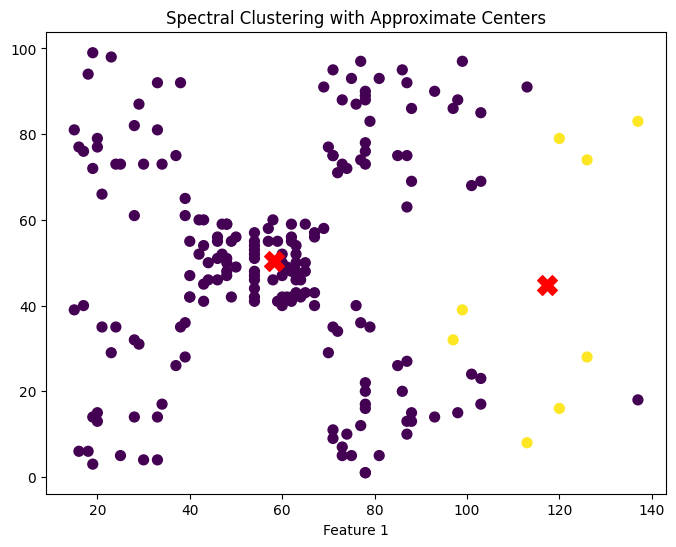

In [18]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', random_state=0)
labels = clustering.fit_predict(x)

# Compute "centroids" (mean of each cluster) manually
cluster_centers = np.array([x[labels == i].mean(axis=0) for i in np.unique(labels)])

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Approx. Cluster Centers')
plt.title('Spectral Clustering with Approximate Centers')
plt.xlabel('Feature 1')

In [19]:
cluster_centers

array([[ 58.19791667,  50.421875  ],
       [117.25      ,  44.875     ]])

C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


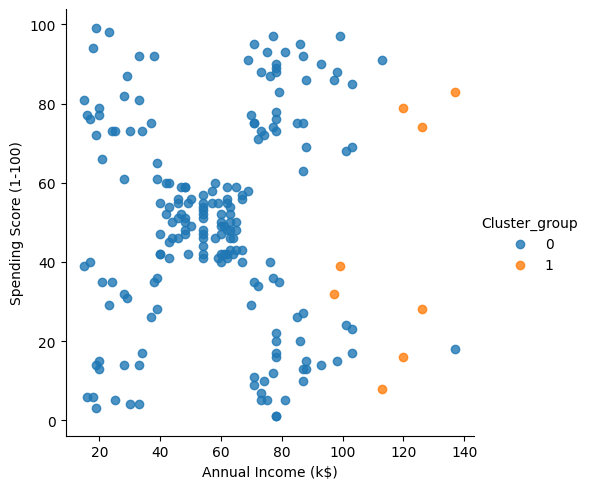

In [21]:
unsupervised=pd.DataFrame(dataset)
unsupervised['Cluster_group']=labels
unsupervised

import seaborn as sns
facet = sns.lmplot(data=unsupervised, x=unsupervised.columns[3], y=unsupervised.columns[4], hue=unsupervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

In [22]:
unsupervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [24]:
from sklearn.metrics import silhouette_score 
score = silhouette_score(x_scaled,labels)
print("Silhouette Score:" , score)

Silhouette Score: 0.3523838269943252
